# Customer Churn Prediction

### In this project, we will predict whether a customer will leave the bank or not based on many factors

Following Factors are:
1. Credit score
2. Location of the Customer
3. Gender
4. Age
5. Tenure
6. Account Balance
7. Number of Bank Products Customer Uses
8. Has Credit Card
9. Is Active Member
10. Estimated Salary

In [43]:
# Importing the essential Libraries
import pandas as pd
import numpy as np

In [44]:
# Reading the Dataset
df = pd.read_csv('curn.csv')

In [45]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [46]:
df['Exited'].value_counts()

Exited
1    4
0    4
Name: count, dtype: int64

In [47]:
df.shape

(8, 14)

In [48]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [49]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [50]:
# Printing Unique Values of the categorical variables
print(df['Geography'].unique())
print(df['Gender'].unique())
print(df['NumOfProducts'].unique())
print(df['HasCrCard'].unique())
print(df['IsActiveMember'].unique())

['France' 'Spain' 'Germany']
['Female' 'Male']
[1 3 2 4]
[1 0]
[1 0]


In [51]:
# Checking if there are null values or not
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [52]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,8.00000,8.000000e+00,8.000000,8.000000,8.000000,8.000000,8.000000,8.00000,8.000000,8.000000,8.000000
mean,4.50000,1.564539e+07,640.125000,41.250000,4.125000,74722.750000,2.000000,0.75000,0.500000,97487.518750,0.500000
std,2.44949,5.410707e+04,156.266656,5.897942,3.090885,65221.062898,1.069045,0.46291,0.534522,40912.871196,0.534522
min,1.00000,1.557401e+07,376.000000,29.000000,1.000000,0.000000,1.000000,0.00000,0.000000,10062.800000,0.000000
25%,2.75000,1.561261e+07,581.500000,40.500000,1.750000,0.000000,1.000000,0.75000,0.000000,90140.997500,0.000000
50%,4.50000,1.564096e+07,632.000000,42.000000,3.000000,98781.820000,2.000000,1.00000,0.500000,106945.730000,0.500000
75%,6.25000,1.566745e+07,729.750000,43.250000,7.250000,117662.760000,2.250000,1.00000,1.000000,115285.397500,1.000000
max,8.00000,1.573789e+07,850.000000,50.000000,8.000000,159660.800000,4.000000,1.00000,1.000000,149756.710000,1.000000


In [53]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [54]:
# Including only Potential Predictors as independent varibles
final_dataset = df[['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']]

In [55]:
final_dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [56]:
# Converting the categorical variables into numerical and avoiding Dummy Varibale Trap
final_dataset = pd.get_dummies(final_dataset, drop_first=True)

In [57]:
final_dataset.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [58]:
import seaborn as sns

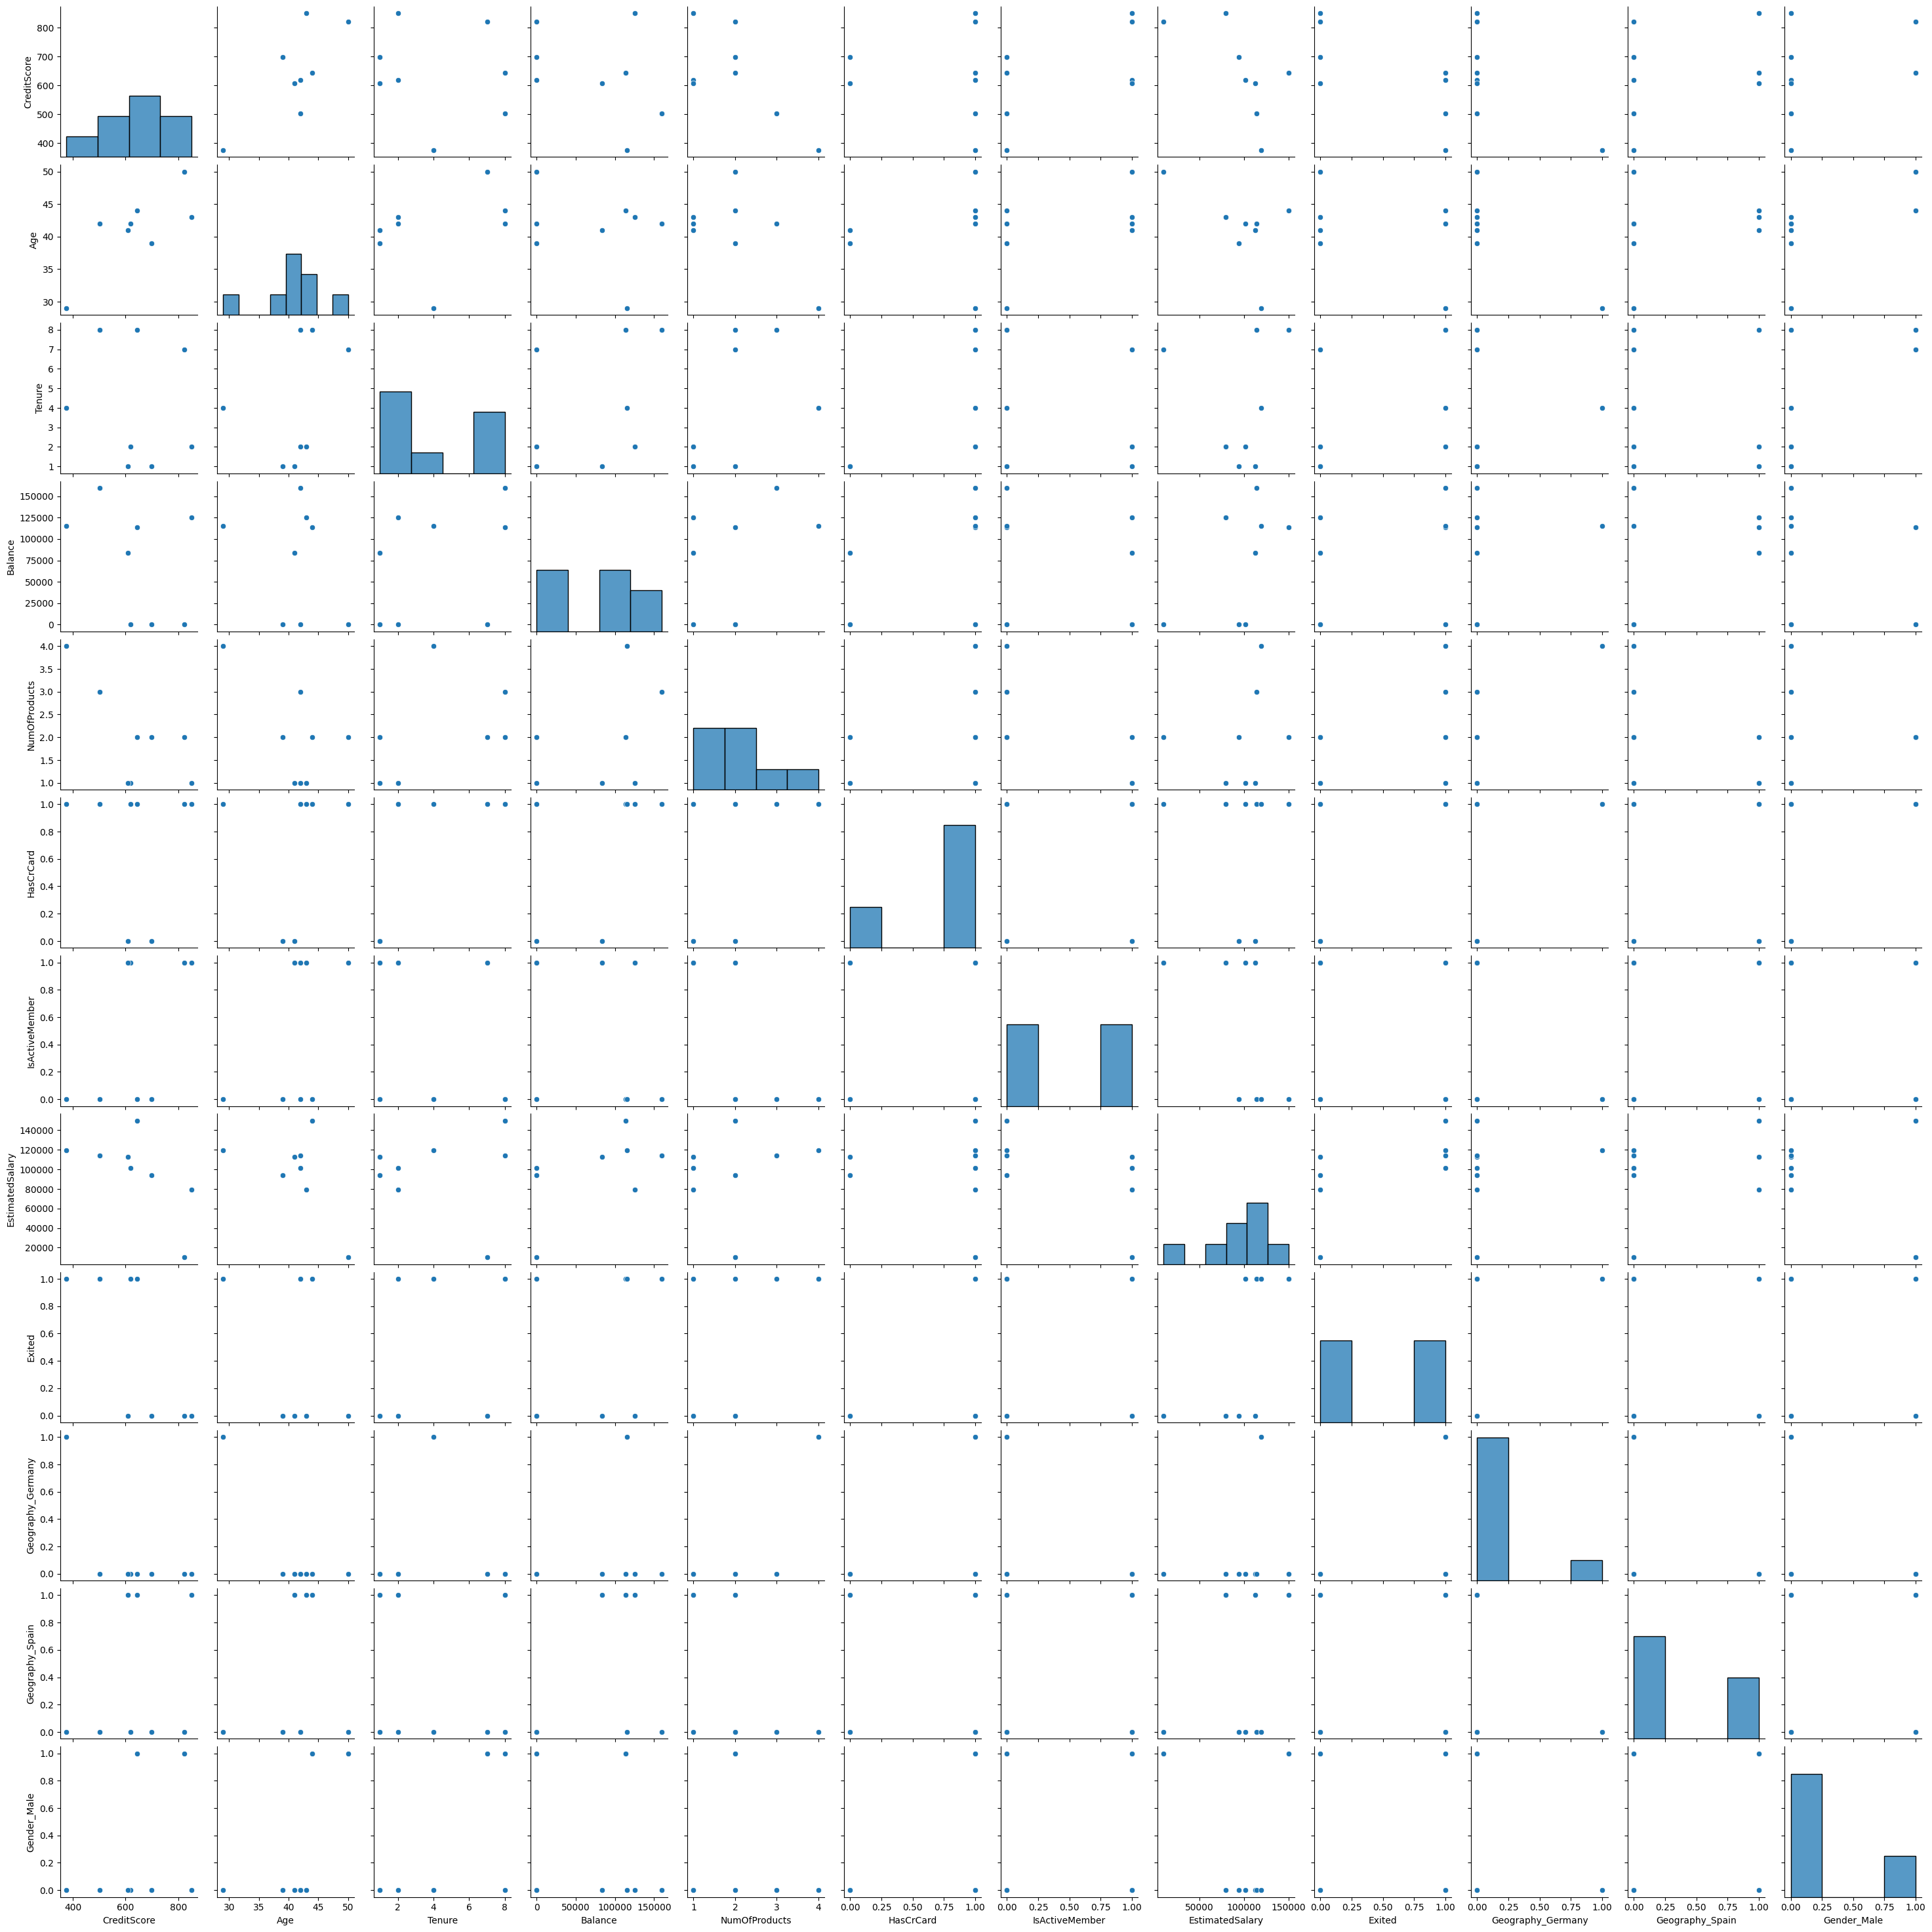

In [59]:
sns.pairplot(final_dataset)

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline

<Axes: >

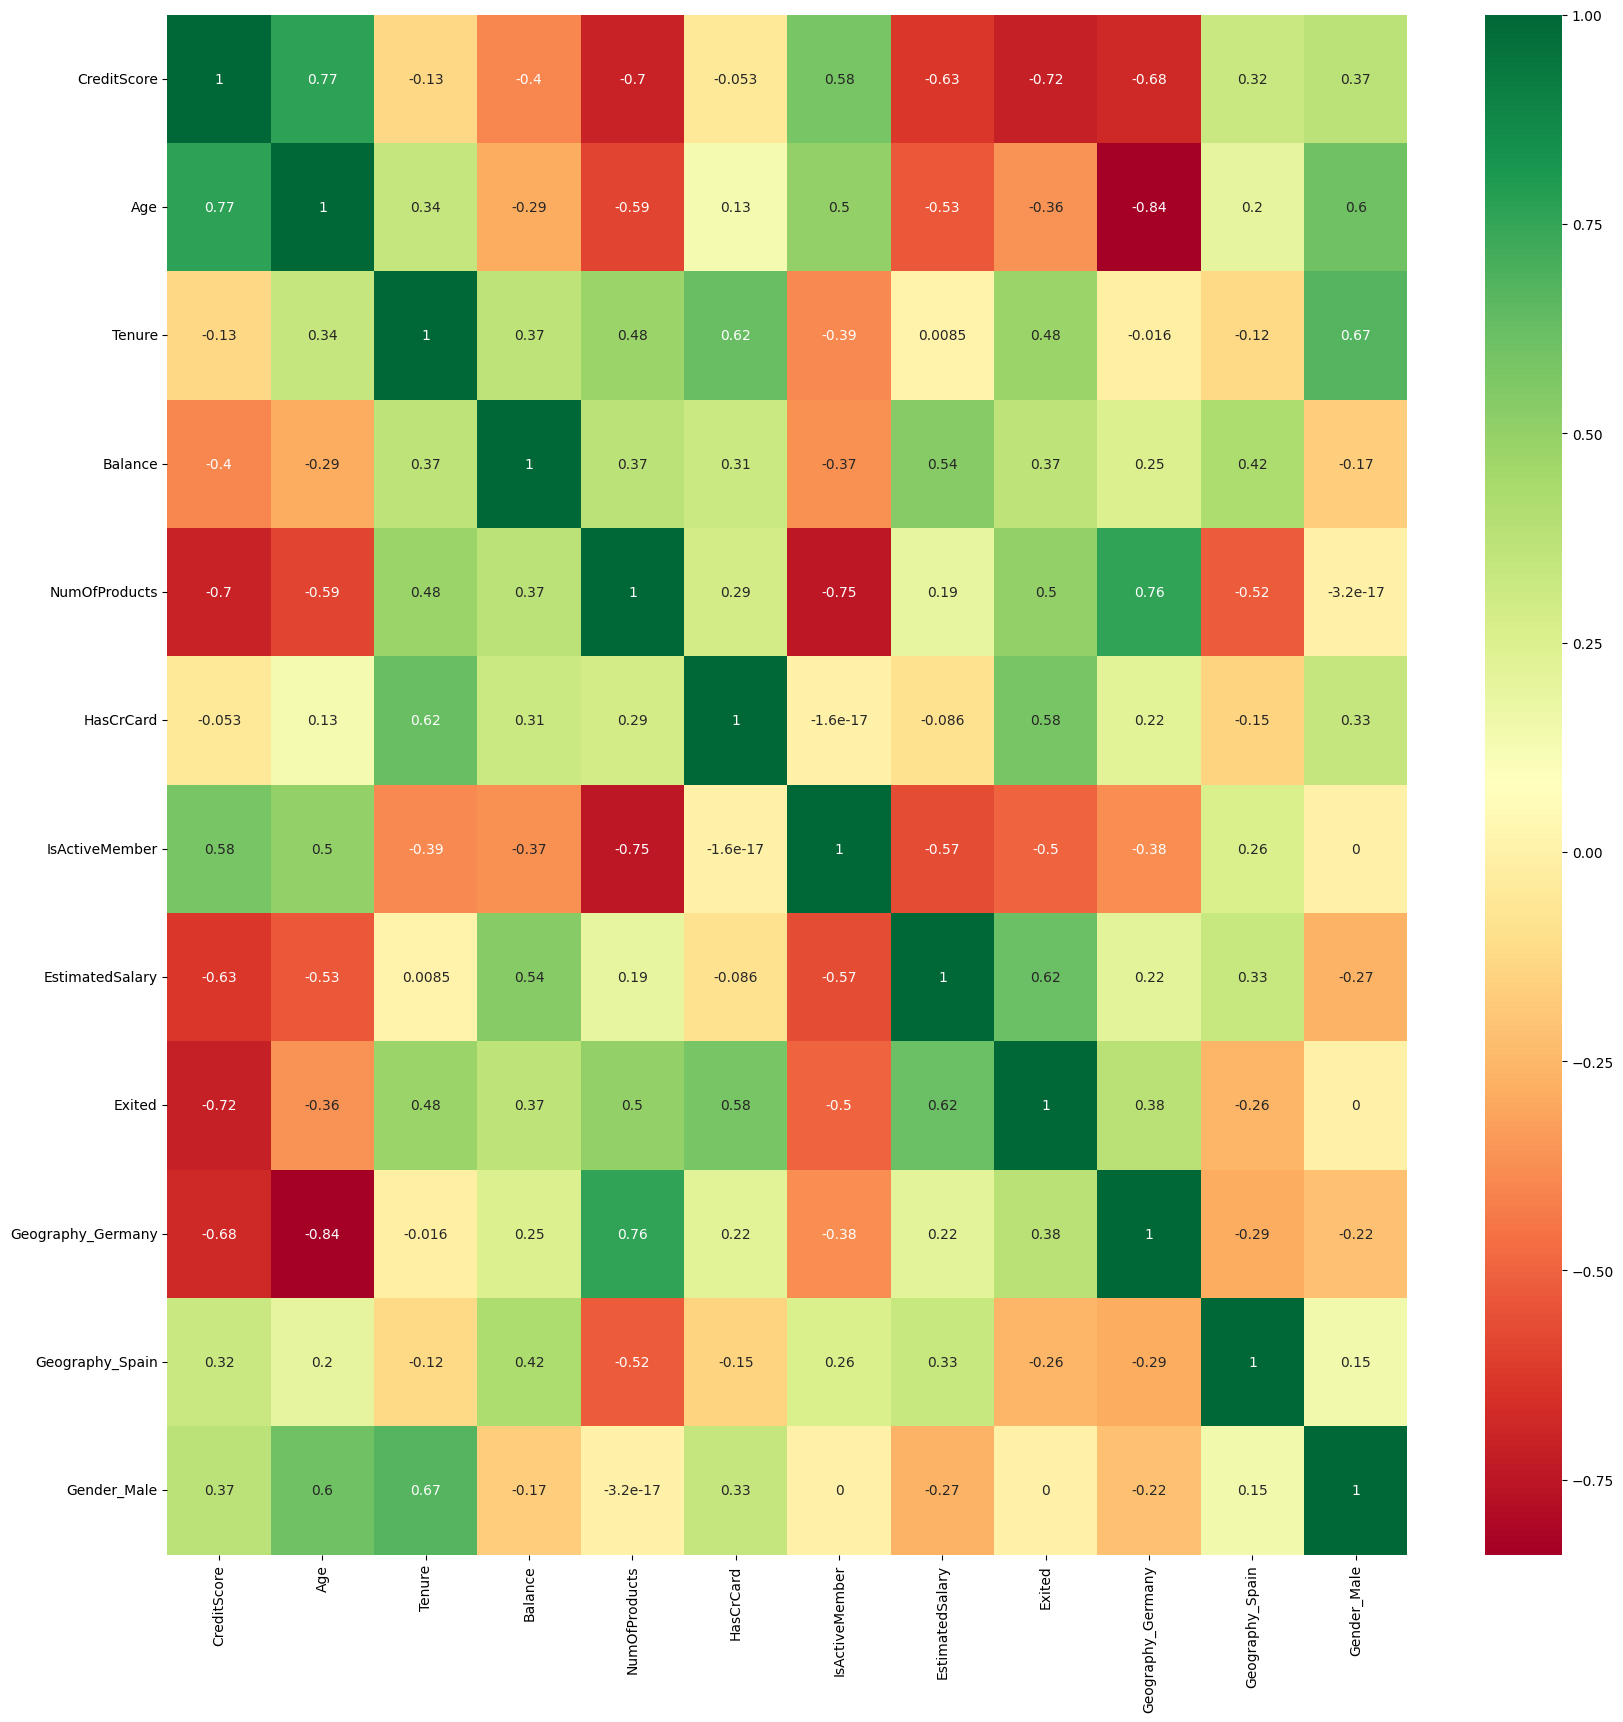

In [61]:
# Plotting The Correlations between all the features
corrmat = final_dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
sns.heatmap(final_dataset[top_corr_features].corr(), annot=True, cmap='RdYlGn')

From the heatmap , we find that teh Age, Balance and the Geography of the Customer are Most important features

In [62]:
final_dataset.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [63]:
# Splitting the Dataset into Dependent and Independent Variables
X = final_dataset.iloc[:, [0,1,2,3,4,5,6,7,9,10,11]]
y = final_dataset.iloc[:, 8].values

In [64]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False


In [65]:
y

array([1, 0, 1, 0, 0, 1, 0, 1], dtype=int64)

In [66]:
# Splitting the dataset into Training and Testing Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 42)

In [67]:
# Standardizing the Dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [68]:
print(X_train[0])

[-0.15259257  0.18648442 -0.75592895 -0.98021217 -1.09321633  0.4472136
  1.          0.41296486 -0.4472136  -0.4472136  -0.4472136 ]


In [69]:
## Feature Importance
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [70]:
print(model.feature_importances_)

[0.34933333 0.01666667 0.03733333 0.00566667 0.04666667 0.315
 0.05666667 0.15616667 0.00266667 0.01133333 0.0025    ]


# Random Forest Classifier

In [71]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [72]:
y_pred = rf.predict(X_test)

In [73]:
from sklearn.metrics import accuracy_score, confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))

[[0 1]
 [0 1]]
0.5


In [74]:
# pickling the Model
import pickle
file = open('Churn_Prediction.pkl', 'wb')
pickle.dump(rf, file)